In [10]:
import os, shutil
original_dataset_dir = 'D:\data\deeplearningpython\dogs-vs-cats\\train'
base_dir = 'D:\data\deeplearningpython\Ch5_2'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir) 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir) 

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst) 

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst) 

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst) 

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [19]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
______

In [20]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [24]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)




Epoch 1/30





100/100 [==============================] - 32s 317ms/step - loss: 0.6928 - acc: 0.5260 - val_loss: 0.6784 - val_acc: 0.5120
Epoch 2/30
100/100 [==============================] - 31s 312ms/step - loss: 0.6569 - acc: 0.6000 - val_loss: 0.6825 - val_acc: 0.5370
Epoch 3/30
100/100 [==============================] - 31s 314ms/step - loss: 0.6004 - acc: 0.6730 - val_loss: 0.6012 - val_acc: 0.6810
Epoch 4/30
100/100 [==============================] - 31s 310ms/step - loss: 0.5587 - acc: 0.7265 - val_loss: 0.6081 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 31s 306ms/step - loss: 0.5316 - acc: 0.7260 - val_loss: 0.5724 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 30s 300ms/step - loss: 0.5043 - acc: 0.7505 - val_loss: 0.5731 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 30s 303ms/step - loss: 0.4825 - acc: 0.7705 - val_loss: 0.5548 - val_acc: 0.7120
Epoch 8/30
100/100 [===========================

In [25]:
model.save('cats_and_dogs_small_1.h5')

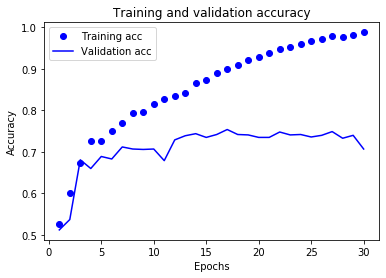

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

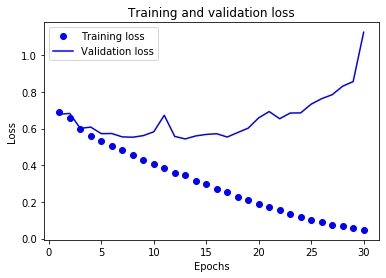

In [29]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

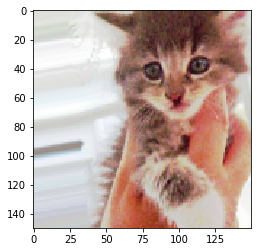

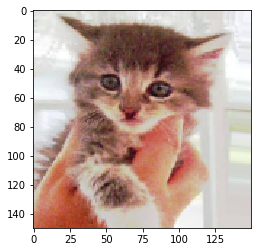

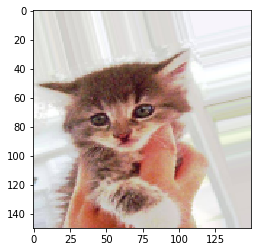

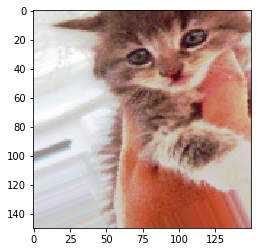

In [30]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 53s 533ms/step - loss: 0.6906 - acc: 0.5384 - val_loss: 0.6869 - val_acc: 0.5336
Epoch 2/100
100/100 [==============================] - 52s 525ms/step - loss: 0.6830 - acc: 0.5606 - val_loss: 0.6771 - val_acc: 0.5496
Epoch 3/100
100/100 [==============================] - 53s 529ms/step - loss: 0.6766 - acc: 0.5709 - val_loss: 0.6543 - val_acc: 0.6193
Epoch 4/100
100/100 [==============================] - 52s 525ms/step - loss: 0.6634 - acc: 0.5906 - val_loss: 0.6684 - val_acc: 0.5728
Epoch 5/100
100/100 [==============================] - 53s 526ms/step - loss: 0.6465 - acc: 0.6275 - val_loss: 0.6654 - val_acc: 0.5799
Epoch 6/100
100/100 [==============================] - 54s 544ms/step - loss: 0.6292 - acc: 0.6453 - val_loss: 0.6124 - 

100/100 [==============================] - 54s 535ms/step - loss: 0.4131 - acc: 0.8137 - val_loss: 0.4541 - val_acc: 0.7945
Epoch 57/100
100/100 [==============================] - 55s 549ms/step - loss: 0.4194 - acc: 0.8069 - val_loss: 0.4261 - val_acc: 0.8093
Epoch 58/100
100/100 [==============================] - 53s 530ms/step - loss: 0.4127 - acc: 0.8109 - val_loss: 0.4656 - val_acc: 0.7792
Epoch 59/100
100/100 [==============================] - 54s 540ms/step - loss: 0.4134 - acc: 0.8138 - val_loss: 0.5193 - val_acc: 0.7564
Epoch 60/100
100/100 [==============================] - 54s 540ms/step - loss: 0.4027 - acc: 0.8141 - val_loss: 0.4770 - val_acc: 0.7703
Epoch 61/100
100/100 [==============================] - 54s 541ms/step - loss: 0.4187 - acc: 0.8044 - val_loss: 0.4441 - val_acc: 0.8061
Epoch 62/100
100/100 [==============================] - 55s 547ms/step - loss: 0.4061 - acc: 0.8069 - val_loss: 0.4351 - val_acc: 0.8039
Epoch 63/100
100/100 [==============================] 

In [32]:
model.save('cats_and_dogs_small_2.h5')

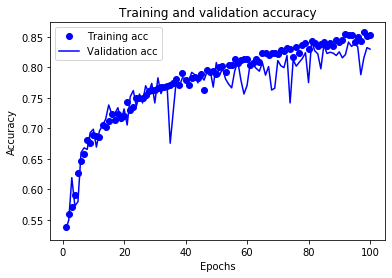

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

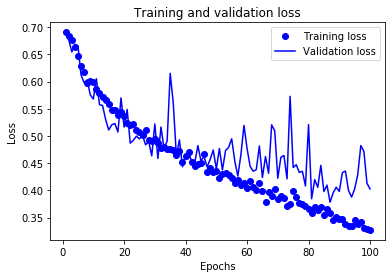

In [34]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()